In [141]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlab.inline

UsageError: Line magic function `%matplotlab.inline` not found.


C:\Users\111\Miniconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


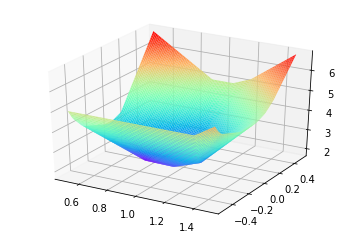

In [263]:
from sklearn import preprocessing
x = np.array([ 338, 333, 328, 207, 226, 25, 179, 60, 208, 606])
y = np.array([ 640, 633, 619, 393, 428, 27, 193, 66, 226, 1591])

x = preprocessing.scale(x)
y = preprocessing.scale(y)
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0.5, 1.5, 0.01)
Y = np.arange(-0.5, 0.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.array([np.sum(np.fabs((X[i][j]*x + Y[i][j] - y))) for i in range(100) for j in range(100)]).reshape(100, 100)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.savefig("./image/image_12.png")
plt.show()

In [266]:
x_data = np.array([ 338, 333, 328, 207, 226, 25, 179, 60, 208, 606])
y_data = np.array([ 640, 633, 619, 393, 428, 27, 193, 66, 226, 1591])

In [267]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

In [275]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = .0000001 # learning rate
iteration = 100000
# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters.
    b = b - lr* b_grad 
    w = w - lr* w_grad
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

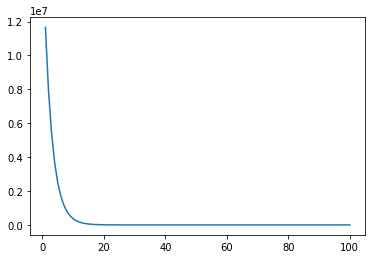

In [276]:
sse = []
for i in range(len(w_history)):
    y = x_data * w_history[i] + b_history[i]
    sse.append(sum((y_data - y) ** 2))
    
sse1 = [sse[i-1]-sse[i] for i in range(1,len(sse))]

plt.plot(range(1,101), sse1[:100])

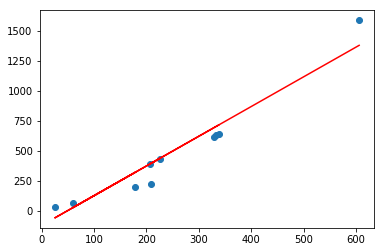

In [277]:
%matplotlib inline

plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], x_data * w + b, 'r-')